<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

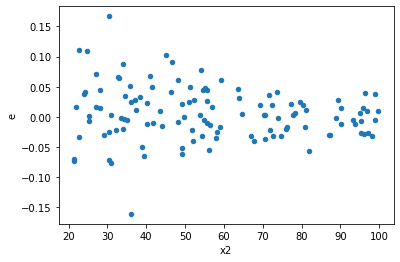

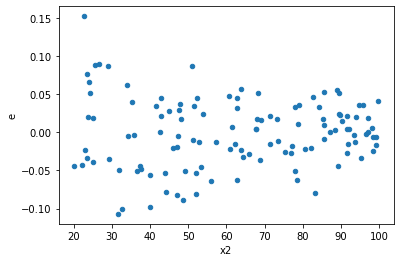

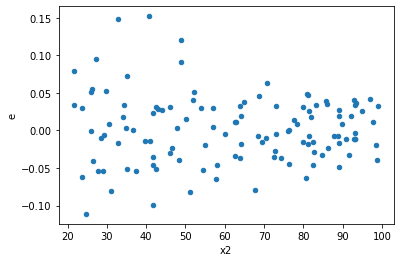

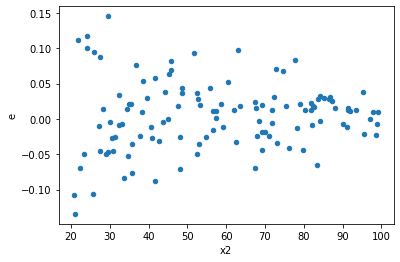

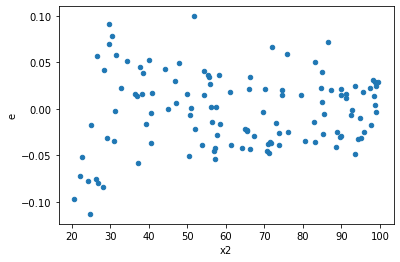

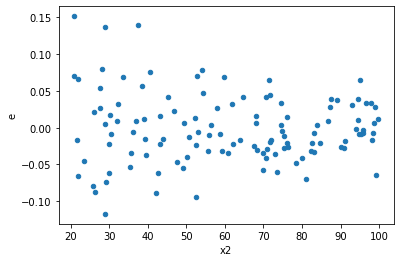

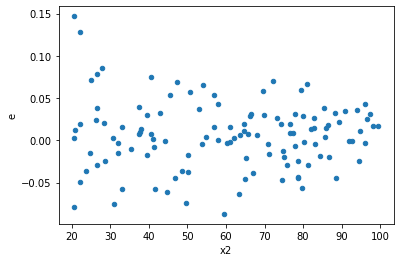

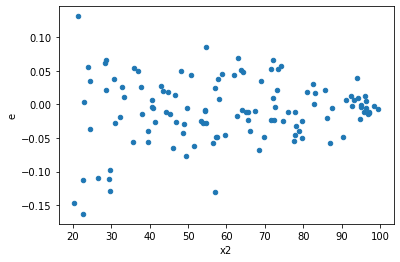

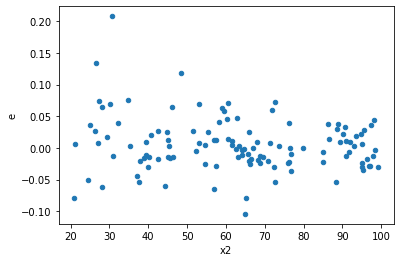

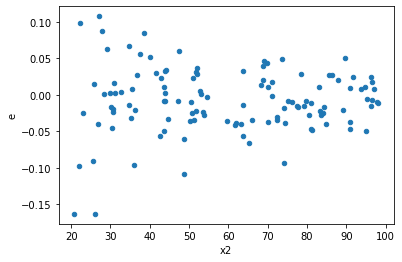

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.15479176606869147,0.02973325969194126,0.0035179946833793514,0.000675755902089574,0.19208553818519405,2.2954039321655115e-07,Reject001=0 : Heteroscedasticity
1.0,44.0,44.0,0.1417109191247033,0.03844670557741334,0.0032207027073796204,0.0008737887631230304,0.27130376272262313,3.135057204523564e-05,Reject001=0 : Heteroscedasticity
2.0,44.0,44.0,0.15433935641741797,0.036597625116061,0.0035077126458504084,0.0008317642071832046,0.2371243859348553,5.035609768901299e-06,Reject001=0 : Heteroscedasticity
3.0,44.0,44.0,0.1803848658178398,0.03980710440170303,0.004099656041314541,0.0009047069182205234,0.22067873721680126,1.808864357775794e-06,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,0.10049110789805726,0.04065113396111905,0.0022838888158649377,0.0009238894082072512,0.4045246869241148,0.0033220783765616486,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,0.16812886795404855,0.041297093878384886,0.0038211106353192854,0.0009385703154178383,0.24562762112733566,8.219351897661339e-06,Reject001=0 : Heteroscedasticity
6.0,44.0,44.0,0.10876931596273487,0.03268749573830845,0.002472029908243974,0.0007428976304161012,0.3005212954497886,0.00011579915775290859,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,0.16472140638287303,0.03983848608251714,0.0037436683268834777,0.0009054201382390259,0.24185372719510342,6.633603135181899e-06,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,0.12669039116378952,0.03774932684980669,0.0028793270719043073,0.0008579392465865157,0.2979651929640277,0.00010412221325328966,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    962
Reject001=1 : Homoscedasticity       38
Name: Result_test, dtype: int64